# Understanding Probability Distributions using Python

### Reza Bagheri

In [1]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import bernoulli, binom, uniform, norm, t, expon 
from scipy.stats import poisson, randint, nbinom, geom, gamma
from scipy.stats import beta, chi2, f

### Bernoulli distribution

In [2]:
x = 1
p = 0.5
bernoulli.pmf(k=x, p=p)

0.5

In [3]:
bernoulli.mean(p=p)

0.5

In [4]:
bernoulli.var(p=p)

0.25

In [5]:
bernoulli.std(p=p)

0.5

In [6]:
bernoulli.cdf(k=1, p=p)

1.0

In [7]:
bernoulli.rvs(p=p, size=5, random_state=1)

array([0, 1, 0, 0, 0])

In [8]:
x=np.arange(0, 2)
p = 0.5
bernoulli_pmf = bernoulli.pmf(k=x, p=p)

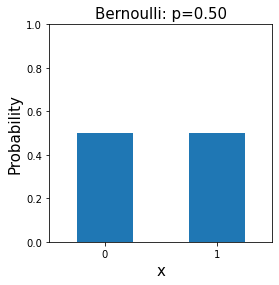

In [9]:
plt.figure(figsize=(4, 4))
plt.bar(x, bernoulli_pmf, width = 0.5)
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)
plt.title('Bernoulli: p=%.2f' % (p), fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.xticks(np.arange(0, 2, 1))
plt.show()

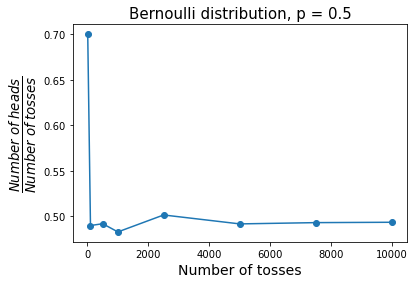

In [10]:
np.random.seed(0)
p = 0.5
sample = bernoulli.rvs(p=p, size = 10000)
num_trials = [10, 100, 500, 1000, 2500, 5000, 7500, 10000]
points = [sample[0:l].mean() for l in num_trials]
plt.plot(num_trials, points, marker='o')
plt.xlabel('Number of tosses', fontsize = 14)
plt.ylabel(r'$\frac{Number\; of \; heads}{Number\; of \; tosses}$', fontsize= 19)
plt.title("Bernoulli distribution, p = {}".format(p), fontsize= 15)
plt.show()

### Binomial distribution

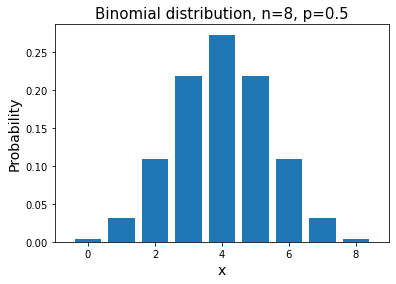

In [11]:
n = 8
p = 0.5
x = np.arange(0, n+1)
binomial = binom.pmf(k=x,n=n, p=p)
plt.bar(x, binomial)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlim([-1, 9])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p), fontsize= 15)
plt.show()

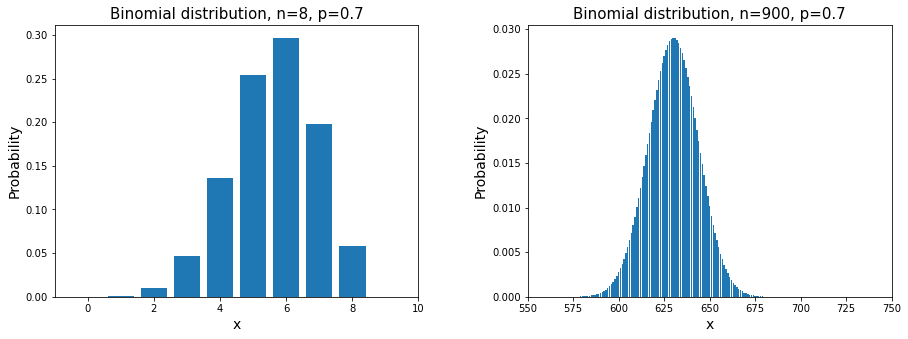

In [12]:
n1 = 8
p = 0.7
x1 = np.arange(0, n1+1)
n2 = 900
p = 0.7
x2 = np.arange(0, n2+1)

binomial1 = binom.pmf(k = x1,n = n1, p = p)
binomial2 = binom.pmf(k = x2,n = n2, p = p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

ax1.bar(x1, binomial1)
ax1.set_xlabel('x', fontsize = 14)
ax1.set_ylabel('Probability', fontsize= 14)
ax1.set_xlim([-1, 10])
ax1.set_title("Binomial distribution, n={0}, p={1}".format(n1, p), fontsize= 15)

ax2.bar(x2, binomial2)
ax2.set_xlabel('x', fontsize = 14)
ax2.set_ylabel('Probability', fontsize= 14)
ax2.set_xlim([550, 750])
ax2.set_title("Binomial distribution, n={0}, p={1}".format(n2, p), fontsize= 15)
plt.show()

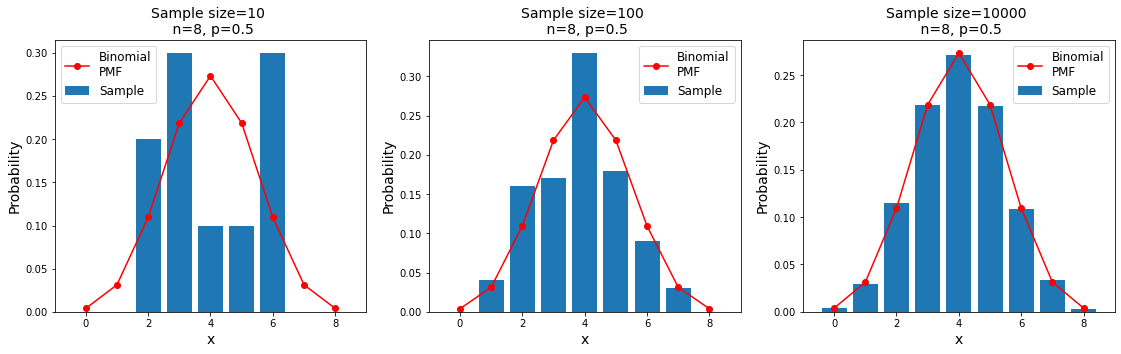

In [13]:
np.random.seed(0)
n = 8
p = 0.5
x = np.arange(9)
binomial = binom.pmf(k = x,n = n, p = p)
fig, axs = plt.subplots(1, 3, figsize=(19, 5))

for id, s in enumerate([10, 100, 10000]):
    sample = [bernoulli.rvs(p=p, size=n).sum() for i in range(s)]
    # sample = binom.rvs(n=n, p=p, size=s)
    values, counts = np.unique(sample, return_counts=True)
    probs = counts / counts.sum()
    axs[id].bar(values, probs, label='Sample')
    axs[id].plot(x, binomial, marker='o', color='red', label='Binomial\nPMF')
    axs[id].set_title("Sample size={0} \n n={1}, p={2}".format(s, n, p), fontsize=14)
    axs[id].set_xlabel('x', fontsize = 14)
    axs[id].set_ylabel('Probability', fontsize=14)
    axs[id].set_xlim([-1, 9])
    axs[id].legend(loc='best', fontsize=12)

plt.show()

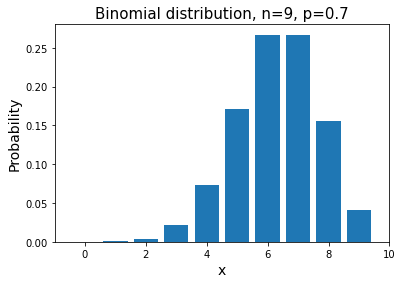

In [14]:
n = 9
p = 0.7
x = np.arange(0, n+1)
binomial = binom.pmf(k=x,n=n, p=p)
plt.bar(x, binomial)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlim([-1, 10])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p), fontsize= 15)

plt.show()

### Negative binomial distribution

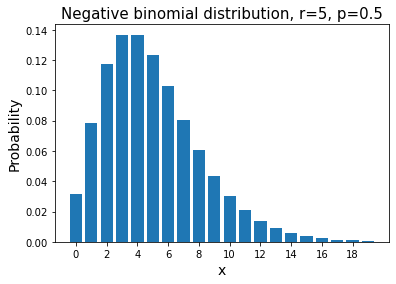

In [15]:
r = 5
p = 0.5
x = np.arange(0, 20)
nbinomial = nbinom.pmf(k=x,n=r, p=p)
plt.bar(x, nbinomial)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title("Negative binomial distribution, r={0}, p={1}".format(r, p),
          fontsize= 15)
plt.xticks(np.arange(0, 20, 2))
plt.show()

In [16]:
z = (r*(1-p)-1)/p
# mode = z, z+1 if z integer
# mode = floor(z) + 1 otherwise

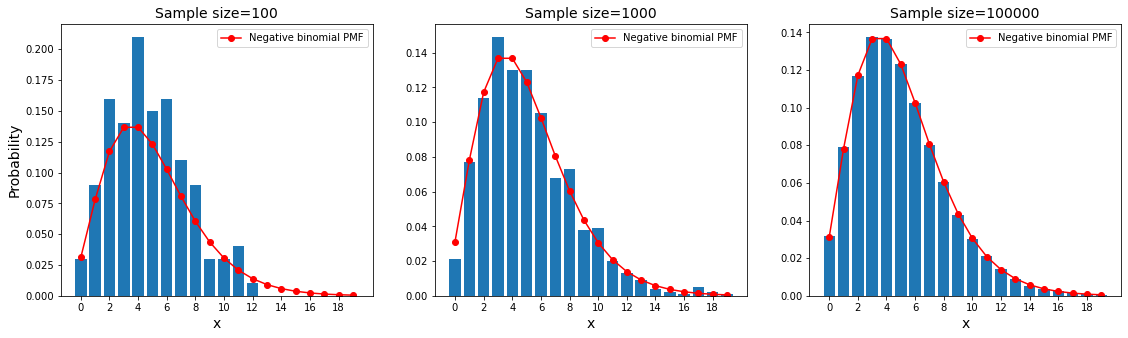

In [17]:
np.random.seed(0)
r = 5
p= 0.5
sample_size = [100, 1000, 100000]
x_range = range(20)
nbinomial = nbinom.pmf(k=x_range,n=r, p=p)
fig, axs = plt.subplots(1, 3, figsize=(19, 5))
for i in range(3):
    probs = []
    for x in x_range:
        num_trials = r + x
        sample = bernoulli.rvs(p=p, size=num_trials*sample_size[i]). \
        reshape(sample_size[i], num_trials)
        filtered_sample = sample[(sample[:,-1] == 1) & (sample.sum(axis = 1) == r)]
        prob = len(filtered_sample) / sample_size[i]
        probs.append(prob)
    axs[i].bar(x_range, probs)
    axs[i].set_xticks(np.arange(0, 20, 2))
    axs[i].set_title("Sample size="+str(sample_size[i]), fontsize=14)
    axs[i].set_xlabel('x', fontsize=14)
    axs[i].plot(x_range, nbinomial, marker='o', color='red', label='Negative binomial PMF')
    axs[i].legend(loc='best')
axs[0].set_ylabel('Probability', fontsize=14)

plt.show()

### Geometric distribution

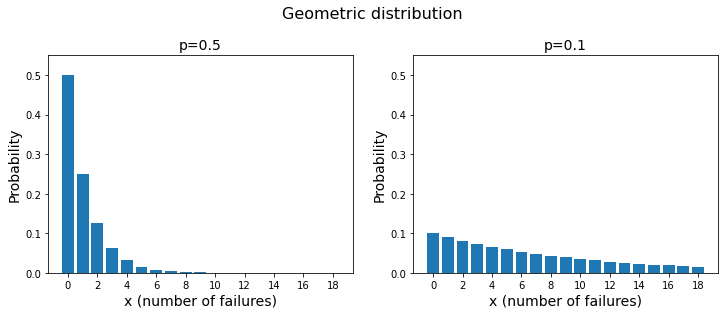

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
p_list = [0.5, 0.1]
x = np.arange(1, 20)
for i, p in enumerate(p_list):
    geometric = geom.pmf(k=x,p=p)
    axs[i].bar(x-1, geometric)
    axs[i].set_xlabel('x (number of failures)', fontsize=14)
    axs[i].set_ylabel('Probability', fontsize=14)
    axs[i].set_title("p={0}".format(p),
              fontsize= 14)
    axs[i].set_ylim([0, 0.55])
    axs[i].set_xticks(np.arange(0, 20, 2))
plt.suptitle("Geometric distribution", fontsize=16, y=1.05)

plt.show()

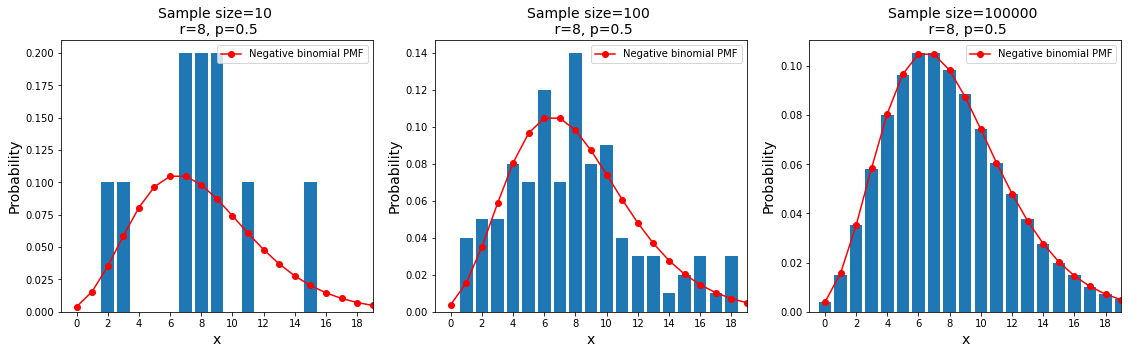

In [19]:
np.random.seed(0)
r = 8
p = 0.5
x_range = range(20)
nbinomial = nbinom.pmf(k=x_range,n=r, p=p)
fig, axs = plt.subplots(1, 3, figsize=(19, 5))

for id, s in enumerate([10, 100, 100000]):
    sample = [(geom.rvs(p=p, size=r)-1).sum() for i in range(s)]
    # sample = nbinom.rvs(n=r, p=p, size=s)
    values, counts = np.unique(sample, return_counts=True)
    probs = counts / counts.sum()
    axs[id].bar(values, probs)
    axs[id].plot(x_range, nbinomial, marker='o', color='red', label='Negative binomial PMF')
    axs[id].set_title("Sample size={0} \n r={1}, p={2}".format(s, r, p), fontsize=14)
    axs[id].set_xlabel('x', fontsize = 14)
    axs[id].set_ylabel('Probability', fontsize=14)
    axs[id].set_xlim([-1, 19])
    axs[id].set_xticks(np.arange(0, 20, 2))
    axs[id].legend(loc='best')

plt.show()

### Poisson distribution

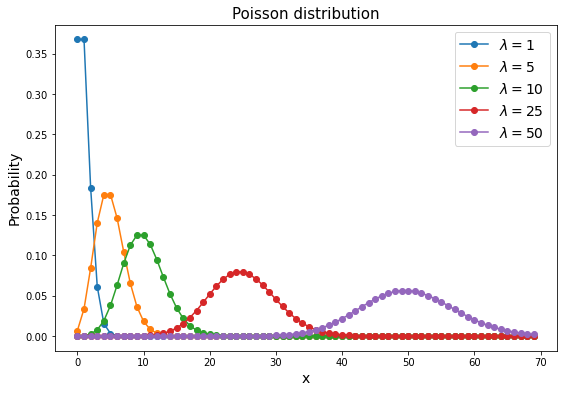

In [20]:
lambda_list = [1, 5, 10, 25, 50]
x = np.arange(0, 70)
plt.figure(figsize=(9, 6))
for lam in lambda_list:
    poisson_dist = poisson.pmf(x, lam)
    plt.plot(x, poisson_dist, marker = 'o', label = r"$\lambda=$" + str(lam))
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
#plt.xlim([-1, 9])
plt.title("Poisson distribution", fontsize= 15)
plt.legend(loc='best', fontsize= 14)
plt.show()

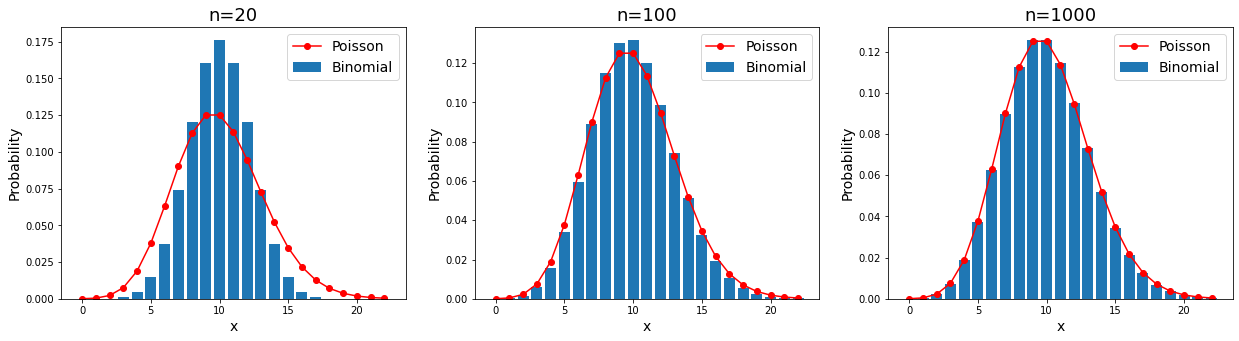

In [21]:
lam = 10
x = np.arange(0, 23)
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

poisson_dist = poisson.pmf(x, lam)
for i, n in enumerate([20, 100, 1000]):
    axs[i].plot(x, poisson_dist, marker = 'o', color = 'red', label = "Poisson")
    binomial = binom.pmf(k=x,n=n, p=lam/n)
    axs[i].bar(x, binomial, label="Binomial")
    axs[i].set_xlabel('x', fontsize=14)
    axs[i].set_ylabel('Probability', fontsize=14)
    axs[i].set_title("n="+str(n), fontsize=18)
    axs[i].legend(loc='best', fontsize=14)

plt.show()

In [22]:
lam = 5
poisson.cdf(5, lam)

0.615960654833063

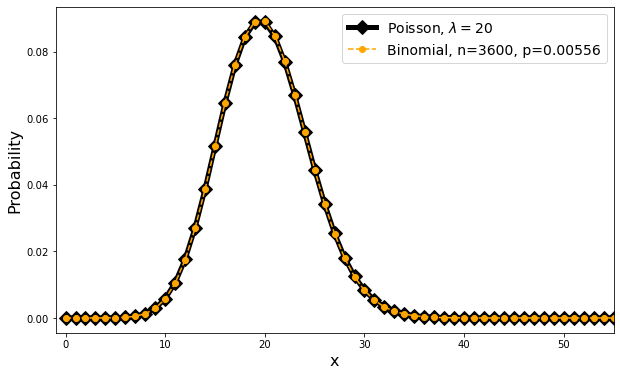

In [23]:
x1 = np.arange(0, 70)
lam = 20
plt.figure(figsize=(10, 6))
poisson_dist = poisson.pmf(x1, lam)
plt.plot(x1, poisson_dist, marker = 'D', markersize=10, linewidth=5,
         color='black', label = r"Poisson, $\lambda=$"+str(lam))

n = 3600
p = lam/n
x2 = np.arange(0, n+1)
binomial = binom.pmf(k=x2, n=n, p=p)
plt.plot(x2, binomial, marker = 'o', color='orange',
         label = r"Binomial, n=3600, p="+str(np.round(p, 5)), linestyle='dashed')

plt.legend(loc='best', fontsize= 14)
plt.xlim([-1, 55])
plt.xlabel('x', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.show()

### Discrete uniform distribution

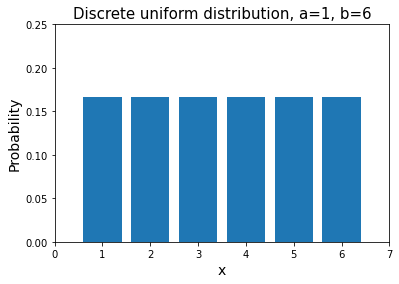

In [24]:
a = 1
b = 6
x = np.arange(1, b+1)
dics_uniform = randint.pmf(x, a, b+1)
plt.bar(x, dics_uniform)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlim([0, 7])
plt.ylim([0, 0.25])
plt.title("Discrete uniform distribution, a={0}, b={1}".format(a, b), fontsize= 15)
plt.show()

### Continuous uniform distribution 

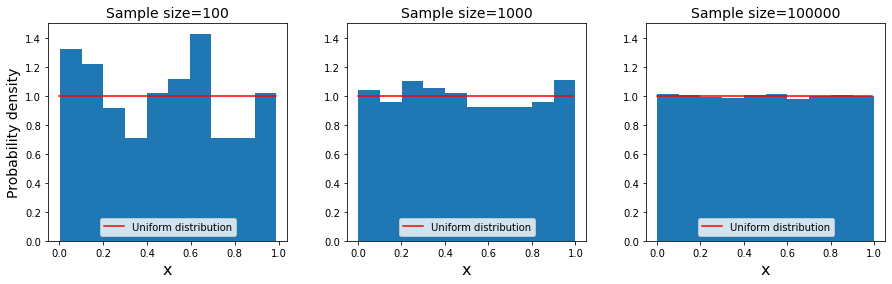

In [25]:
np.random.seed(0)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.25)
x = np.arange(0, 1, 0.01)
unif_dist = uniform.pdf(x)
for i, n in enumerate([100, 1000, 100000]):
    sample = uniform.rvs(size=n)
    axs[i].hist(sample, density=True)
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].plot(x, unif_dist, color='red', label="Uniform distribution")
    axs[i].set_ylim([0, 1.5])
    axs[i].set_title("Sample size="+str(n), fontsize=14)
    axs[i].legend(loc="lower center")
axs[0].set_ylabel('Probability density', fontsize=14)
plt.show()

### Exponential distribution

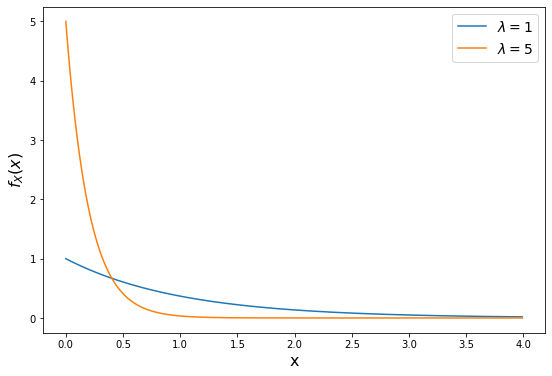

In [26]:
x = np.arange(0, 4, 0.01)
lam1 = 1
lam2 = 5
plt.figure(figsize=(9, 6))
exp_dist1= expon.pdf(x=x, scale=1/lam1)
exp_dist2 = expon.pdf(x=x, scale=1/lam2)
plt.plot(x, exp_dist1, label=r'$\lambda=$'+str(lam1))
plt.plot(x, exp_dist2, label=r'$\lambda=$'+str(lam2))
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.legend(loc='best', fontsize= 14)

plt.show()

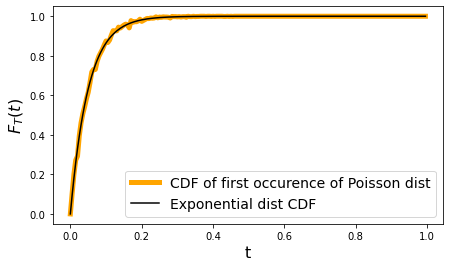

In [27]:
np.random.seed(0)
rate = 20
cdf_list = []
t_range = np.arange(0, 1, 0.005)

plt.figure(figsize=(7, 4))
for t in t_range:
    lam = rate*t
    rvs = poisson.rvs(mu=lam, size = 1000)
    cdf_list.append((rvs > 0).mean())
plt.plot(t_range, cdf_list, linewidth=5, color='orange',
         label='CDF of first occurence of Poisson dist')
exp_dist_cdf= expon.cdf(x=t_range, scale=1/rate)
plt.plot(t_range, exp_dist_cdf, color='black', label='Exponential dist CDF')
plt.xlabel('t', fontsize=16)
plt.ylabel('$F_T(t)$', fontsize=16)
plt.legend(loc='best', fontsize= 14)

plt.show()

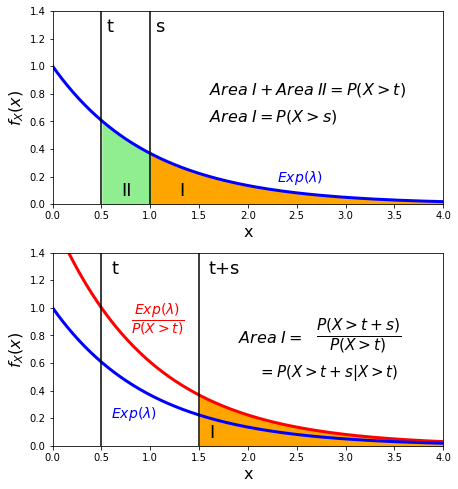

In [28]:
x = np.arange(0, 5, 0.01)
lam = 1
t = 0.5
s = 1

fig, axs = plt.subplots(2, 1, figsize=(7, 8))
plt.subplots_adjust(hspace=0.25)

exp_dist= expon.pdf(x=x, scale=1/lam)
p_x_gt_t = 1-expon.cdf(x=t, scale=1/lam)
exp_dist_normalized= expon.pdf(x=x, scale=1/lam) / p_x_gt_t

axs[0].plot(x, exp_dist, linewidth=3, color='blue')
axs[0].fill_between(x, exp_dist, 0, where = (x > t) & (x <= np.inf),
                    color = 'lightgreen')
axs[0].fill_between(x, exp_dist, 0, where = (x > s) & (x <= np.inf),
                    color = 'orange')
axs[0].axvline(x=t, color='black')
axs[0].axvline(x=s, color='black')

axs[0].text(t+0.05, 1.25, "t", fontsize=18)
axs[0].text(s+0.05, 1.25, "s", fontsize=18)
axs[0].text(0.7, 0.06, "II", fontsize=18)
axs[0].text(1.3, 0.06, "I", fontsize=18)
axs[0].text(1.6, 0.8, r"$Area \; I+Area \; II=P(X>t)$", fontsize=16)
axs[0].text(1.6, 0.6, r"$Area \; I=P(X > s)$", fontsize=16)
axs[0].text(2.3, 0.16, r"$Exp(\lambda)$", fontsize=14, color='blue')

axs[0].set_xlabel('x', fontsize=16)
axs[0].set_ylabel('$f_X(x)$', fontsize=16)
axs[0].set_xlim([0, 4])
axs[0].set_ylim([0, 1.4])

axs[1].plot(x, exp_dist_normalized, linewidth=3, color='red')
axs[1].plot(x, exp_dist, linewidth=3, color='blue')
axs[1].fill_between(x, exp_dist_normalized, 0, where = (x > t+s) & (x < np.inf),
                    color = 'orange')
axs[1].axvline(x=t, color='black')
axs[1].axvline(x=t+s, color='black')

axs[1].text(0.6, 1.25, "t", fontsize=18)
axs[1].text(1.6, 1.25, "t+s", fontsize=18)
axs[1].text(1.6, 0.06, "I", fontsize=18)
axs[1].text(1.9, 0.75, "$Area \; I= $", fontsize=16)
axs[1].text(2.7, 0.75, r"$\frac{P(X > t+s)}{P(X>t)}$", fontsize=22)
axs[1].text(0.8, 0.88, r"$\frac{Exp(\lambda)}{P(X>t)}$", fontsize=20, color='red')
axs[1].text(2.1, 0.5, r"$=P(X > t+s| X>t)$", fontsize=15, color='black')
axs[1].text(0.6, 0.2, r"$Exp(\lambda)$", fontsize=14, color='blue')

axs[1].set_xlabel('x', fontsize=16)
axs[1].set_ylabel('$f_X(x)$', fontsize=16)
axs[1].set_xlim([0, 4])
axs[1].set_ylim([0, 1.4])

plt.show()

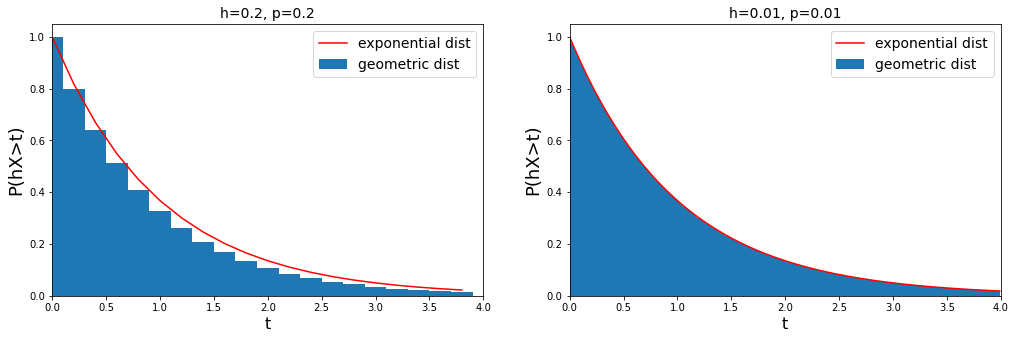

In [29]:
np.random.seed(0)
t_lims = [0, 4]
lam = 1
fig, axs = plt.subplots(1, 2, figsize=(17, 5))

for id, h in enumerate([2e-1, 1e-2]):
    p = lam * h   
    t  = np.arange(t_lims[0], t_lims[1], h)
    t_h = np.round(t / h)
    exp_dist_plot = 1- expon.cdf(x=t, scale=1/lam)
    geom_dist_plot = 1- geom.cdf(k=t_h, p=p)
    axs[id].plot(t, exp_dist_plot, color='red', label="exponential dist")
    axs[id].bar(t, geom_dist_plot, width=h, label="geometric dist")
    
    axs[id].set_title("h={0}, p={1}".format(h, p), fontsize=14)
    
    axs[id].set_xlabel('t', fontsize=16)
    axs[id].set_ylabel('P(hX>t)', fontsize = 18)
    axs[id].set_xlim([0, 4])
    axs[id].legend(loc='best', fontsize=14)

plt.show()

### Gamma distribution

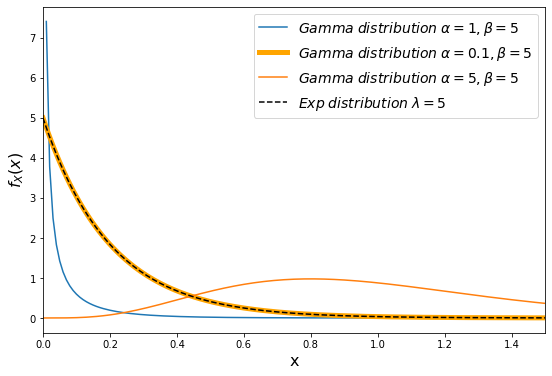

In [30]:
x = np.arange(0, 4, 0.01)
alpha1 = 0.1
alpha2 = 1
alpha3 = 5
beta_val = 5

plt.figure(figsize=(9, 6))
gamma_dist1 = gamma.pdf(x=x, a=alpha1, scale=1/beta_val)
gamma_dist2 = gamma.pdf(x=x, a=alpha2, scale=1/beta_val)
gamma_dist3 = gamma.pdf(x=x, a=alpha3, scale=1/beta_val)
expon_dist = expon.pdf(x=x, scale=1/beta_val)

plt.plot(x, gamma_dist1,
         label=r'$Gamma \; distribution \; \alpha={}, \beta={}$'.\
         format(alpha2, beta_val))
plt.plot(x, gamma_dist2,
         label=r'$Gamma \; distribution \;  \alpha={}, \beta={}$'.\
         format(alpha1, beta_val),
         linewidth=5, color='orange')
plt.plot(x, gamma_dist3,
         label=r'$Gamma \; distribution \; \alpha={}, \beta={}$'.\
         format(alpha3, beta_val))
plt.plot(x, expon_dist,
         label=r'$Exp \; distribution \; \lambda={}$'.\
         format(beta_val),
         linestyle='dashed', color='black')

plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.xlim([0, 1.5])
plt.legend(loc='best', fontsize= 14)

plt.show()

### Beta distribution

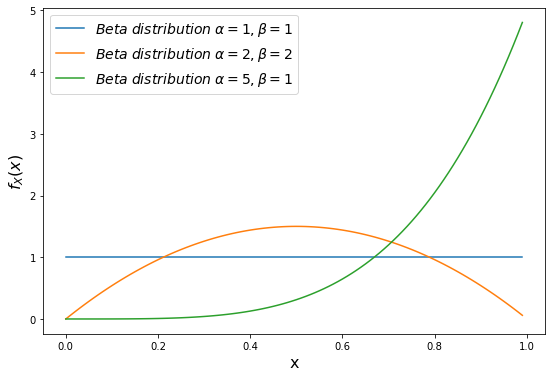

In [31]:
x = np.arange(0, 1, 0.01)
param_list = [(1,1), (2,2), (5,1)]

plt.figure(figsize=(9, 6))
for (alpha_val, beta_val) in param_list:
    beta_dist = beta.pdf(x=x, a=alpha_val, b=beta_val)
    plt.plot(x, beta_dist,
             label=r'$Beta \; distribution \; \alpha={}, \beta={}$'.\
             format(alpha_val, beta_val))
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.legend(loc='best', fontsize= 14)

plt.show()

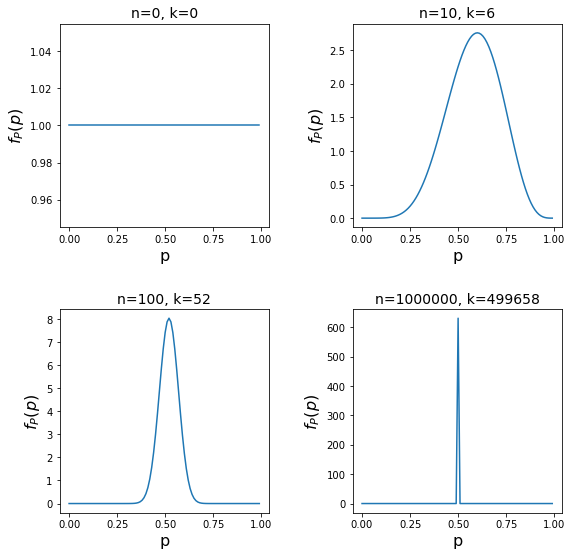

In [32]:
np.random.seed(0)
p = 0.5
n_list = [0, 10, 100, int(1e6)]
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, n in enumerate(n_list):
    k = binom.rvs(n=n, p=p)
    beta_dist = beta.pdf(x=x, a=1+k, b=1+n-k)
    axs[i//2, i%2].plot(x, beta_dist, label=r'n={}, k={}'.format(n, k))
    axs[i//2, i%2].set_xlabel('p', fontsize=16)
    axs[i//2, i%2].set_ylabel('$f_P(p)$', fontsize=16)
    axs[i//2, i%2].set_title('n={}, k={}'.format(n, k), fontsize= 14)
    axs[i//2, i%2].set_xticks(np.arange(0, 1.1, 0.25)) 

plt.show()

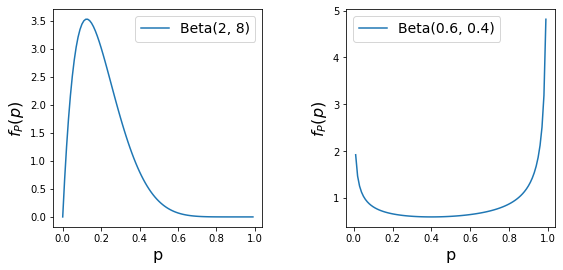

In [33]:
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

param_list = [(2, 8), (0.6, 0.4)]

for i, (alpha_val, beta_val) in enumerate(param_list):
    beta_dist = beta.pdf(x=x, a=alpha_val, b=beta_val)
    axs[i].plot(x, beta_dist, label='Beta({}, {})'.format(alpha_val, beta_val))
    axs[i].set_xlabel('p', fontsize=16)
    axs[i].set_ylabel('$f_P(p)$', fontsize=16)
    axs[i].legend(loc='best', fontsize= 14)

plt.show()

### Normal distribution

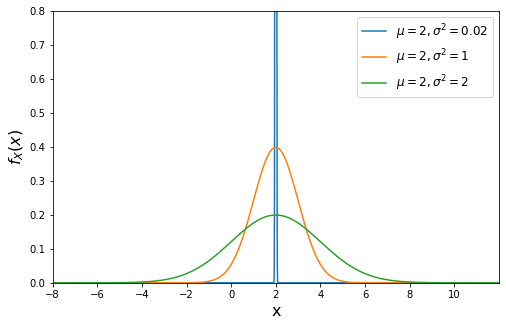

In [34]:
x = np.arange(-10, 15, 0.01)
mu = 2
sigma1 = 0.02
sigma2 = 1
sigma3 = 2
y1 = norm.pdf(x, loc = mu, scale = sigma1)
y2 = norm.pdf(x, loc = mu, scale = sigma2)
y3 = norm.pdf(x, loc = mu, scale = sigma3)
plt.figure(figsize=(8, 5))

plt.plot(x, y1, label='$\mu={}, \sigma^2={}$'.format(mu, sigma1))
plt.plot(x, y2, label='$\mu={}, \sigma^2={}$'.format(mu, sigma2))
plt.plot(x, y3, label='$\mu={}, \sigma^2={}$'.format(mu, sigma3))
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.xlim([-8, 12])
plt.ylim([0, 0.8])
plt.xticks(np.arange(-8, 12, 2))    
plt.legend(loc='best', fontsize=12)

plt.show()

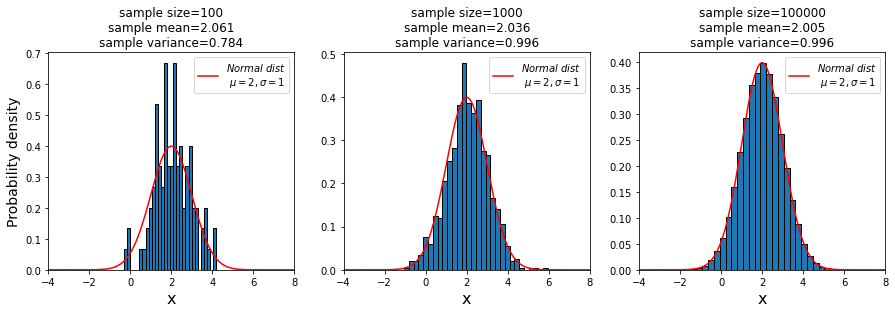

In [35]:
np.random.seed(1)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.2)
x = np.arange(-10, 15, 0.01)
mu = 2
sigma = 1
normal_dist = norm.pdf(x, loc = mu, scale = sigma)
for i, n in enumerate([100, 1000, 100000]):
    sample = norm.rvs(loc = mu, scale = sigma, size=n)
    sample_mean = np.round(sample.mean(), 3)
    sample_var = np.round(sample.var(), 3)
    axs[i].hist(sample, density=True, bins = 30, edgecolor='black', linewidth=1)
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].plot(x, normal_dist, color='red', label="$Normal \; dist$\n $\mu=2, \sigma=1$")
    axs[i].set_xlim([-4, 8])
    axs[i].set_title("sample size={}\nsample mean={}\nsample variance={}".format(n,
         sample_mean, sample_var), fontsize=12)
    axs[i].legend(loc="best")
axs[0].set_ylabel('Probability density', fontsize=14)

plt.show()

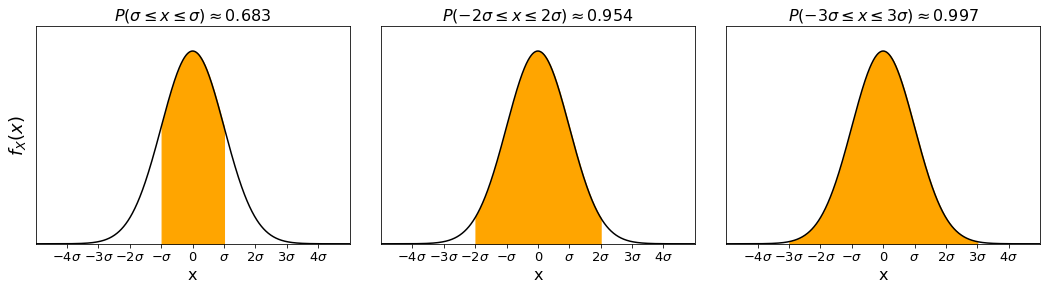

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

plt.subplots_adjust(wspace=0.1)
x = np.arange(-10, 15, 0.01)
mu = 0
sigma = 1
normal_dist = norm.pdf(x, loc = mu, scale = sigma)
for i in range(3):
    axs[i].plot(x, normal_dist, color='black')
    xs = (i+1) * sigma
    val = norm.cdf(xs) - norm.cdf(-xs)
    axs[i].fill_between(x, normal_dist, 0, where = (x >= -xs) & (x <= xs), color = 'orange')
    axs[i].set_xlim([-5, 5])
    axs[i].set_ylim([0, 0.45])
    if xs != 1:
        axs[i].set_title(r"$P({0}\sigma \leq x \leq {1}\sigma) \approx {2}$".\
                         format(-xs, xs, np.round(val, 3)), fontsize=16)
    else:
        axs[i].set_title(r"$P(\sigma \leq x \leq \sigma) \approx {0}$".format(np.round(val, 3)), fontsize=16)
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].set_xticks(np.arange(-4*sigma, 4*sigma+1, sigma))
    fig.canvas.draw()
    labels = [item.get_text() for item in axs[i].get_xticklabels()]
    new_labels= [(item + r"$\sigma$").replace('1', '').replace('-1', '') if item !='0' else item for item in labels]
    axs[i].set_xticklabels(new_labels, fontsize = 13)
    axs[i].set_yticks([])
axs[0].set_ylabel('$f_X(x)$', fontsize=18)

plt.show()

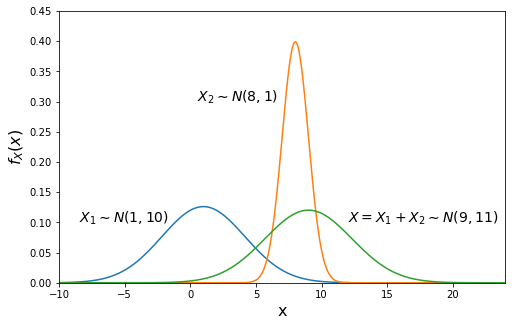

In [37]:
x = np.arange(-12, 24, 0.01)
mu1 = 1
mu2 = 8
mu3 = mu1 + mu2
var1 = 10
var2 = 1
var3 = var1 + var2
y1 = norm.pdf(x, loc = mu1, scale = np.sqrt(var1))
y2 = norm.pdf(x, loc = mu2, scale = np.sqrt(var2))
y3 = norm.pdf(x, loc = mu3, scale = np.sqrt(var3))
plt.figure(figsize=(8, 5))

plt.plot(x, y1, label='$\mu_1={}, \sigma_1^2={}$'.format(mu1, var1))
plt.plot(x, y2, label='$\mu_2={}, \sigma_2^2={}$'.format(mu2, var2))
plt.plot(x, y3, label='$\mu_3={}, \sigma_3^2={}$'.format(mu3, var3))
plt.text(-8.5, 0.1, "$X_1 \sim  N({}, {})$".format(mu1, var1), fontsize = 14)
plt.text(0.5, 0.3, "$X_2 \sim N({}, {})$".format(mu2, var2), fontsize = 14)
plt.text(12, 0.1, "$X=X_1+X_2 \sim N({}, {})$".format(mu3, var3), fontsize = 14)
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.xlim([-10, 24])
plt.ylim([0, 0.45])

plt.show()

### CLT

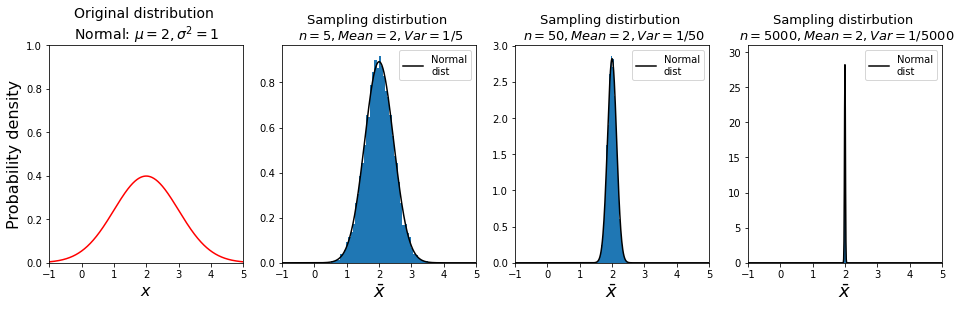

In [38]:
np.random.seed(2)
mu = 2
var = 1 
n1 = 5
n2 = 50
num_samples = 10000
x = np.arange(-1, 5, 0.01)
dist = norm.pdf(x, loc = mu, scale = np.sqrt(var))

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].plot(x, dist, color='red')
axs[0].set_title('Original distribution \nNormal: $\mu={}, \sigma^2={}$'.format(mu, var), fontsize = 14)
axs[0].set_xlim([-1, 5])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('$x$', fontsize=16)
axs[0].set_ylabel('Probability density', fontsize=16)


for i, n in enumerate([5, 50 ,5000]):
    samples = norm.rvs(loc = mu, scale = np.sqrt(var), size=n* num_samples).reshape(num_samples, n)
    samples_means = samples.mean(axis = 1)
    sampling_dist = norm.pdf(x, loc = mu, scale = np.sqrt(var/n))
    axs[i+1].plot(x, sampling_dist, color='black', label='Normal\ndist')
    axs[i+1].hist(samples_means, density=True, bins = 50)
    axs[i+1].set_title('Sampling distirbution \n $n={0}, Mean={1}, Var={2}/{0}$'.format(n, mu, var), fontsize = 13)
    axs[i+1].set_xlim([-1, 5])
    axs[i+1].set_xlabel(r'$\bar{x}$', fontsize=18)
    axs[i+1].legend(loc='best', fontsize=10)

plt.show()

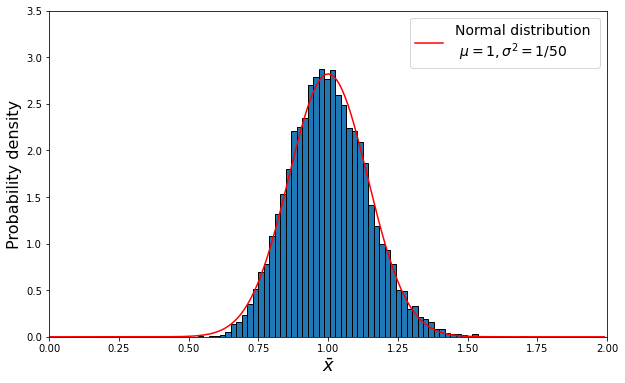

In [39]:
np.random.seed(10)
n= 50
mu = 1
sigma = 1

xbar = [expon.rvs(size=n).mean() for i in range(10000)]

x = np.arange(0, 2, 0.01)
y = norm.pdf(x, loc=mu, scale= sigma / n**0.5)

plt.figure(figsize=(10, 6))
plt.hist(xbar, density=True, bins = 60, edgecolor='black', linewidth=1)
plt.plot(x, y, color = 'red', label="Normal distribution \n $\mu={}, \sigma^2=1/{}$".format(mu, n))
plt.legend(loc='best', fontsize=14)
plt.xlim([0, 2])
plt.ylim([0, 3.5])
plt.xlabel(r'$\bar{x}$', fontsize=18)
plt.ylabel('Probability density', fontsize=16)

plt.show()

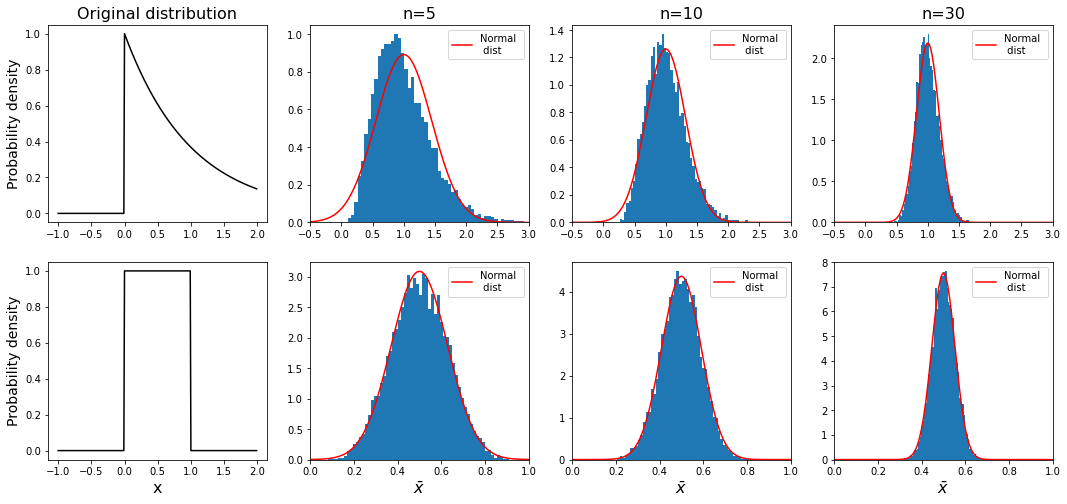

In [40]:
np.random.seed(0)
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
plt.subplots_adjust(wspace=0.2)
x = np.arange(0, 15, 0.01)
mu1 = 1
sigma1 = 1
mu2 = uniform.mean()
sigma2 = uniform.std() 
x1 = np.arange(-1, 3, 0.01)
x2 = np.arange(0, 2, 0.01)
x = np.arange(-1, 2, 0.01)
dist1 = expon.pdf(x)
dist2 = uniform.pdf(x)

axs[0, 0].plot(x, dist1, color = 'black', label="Exponential \n distribution")
axs[1, 0].plot(x, dist2, color = 'black', label="Uniform \n distribution")
axs[0, 0].set_title("Original distribution", fontsize = 16)
axs[1, 0].set_xlabel('x', fontsize=16)

for i, n in enumerate([5, 10, 30]):
    xbar1 = [expon.rvs(size=n).mean() for i in range(10000)]
    xbar2 = [uniform.rvs(size=n).mean() for i in range(10000)]   
    y1 = norm.pdf(x1, loc=mu1, scale= sigma1 / n**0.5)
    y2 = norm.pdf(x2, loc=mu2, scale= sigma2 / n**0.5)
    axs[0, i+1].hist(xbar1, density=True, bins = 60)
    axs[1, i+1].hist(xbar2, density=True, bins = 60)
    axs[0, i+1].plot(x1, y1, color = 'red', label="Normal \n dist")
    axs[1, i+1].plot(x2, y2, color = 'red', label="Normal \n dist")
    axs[0, i+1].set_xlim([-0.5, 3])
    axs[1, i+1].set_xlim([0, 1])
    axs[0, i+1].set_title("n="+str(n), fontsize = 16)
    axs[1, i+1].set_xlabel(r'$\bar{x}$', fontsize=16)
    axs[0, i+1].legend(loc="best")
    axs[1, i+1].legend(loc="best")

axs[0, 0].set_ylabel('Probability density', fontsize=14)
axs[1, 0].set_ylabel('Probability density', fontsize=14)

plt.show()

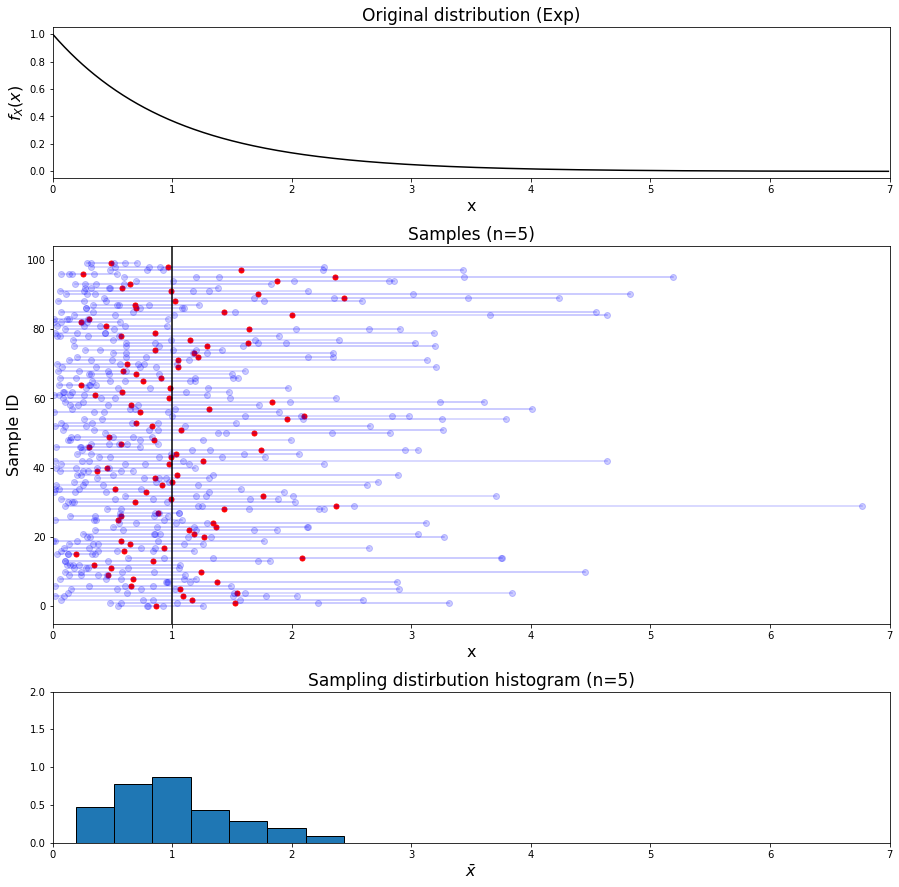

In [41]:
np.random.seed(0)
x = np.arange(0, 7, 0.01)
n = 5
num_samples = 100
samples = expon.rvs(size=n*num_samples).reshape(num_samples, n)
fig, axs = plt.subplots(3, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [1, 2.5, 1]})
plt.subplots_adjust(hspace=0.3)
xbar = samples.mean(axis = 1)
dist = expon.pdf(x)

axs[0].plot(x, dist, color = 'black')
axs[0].set_title("Original distribution (Exp)", fontsize = 17)
axs[0].set_xlabel('x', fontsize=16)
axs[0].set_xlim([0, 7])
axs[0].set_ylabel(r'$f_X(x)$', fontsize=16)

for i in range(num_samples):
    axs[1].plot(samples[i], n*[i], marker='o', color = 'blue', alpha = 0.2)
    axs[1].scatter(xbar[i], i, color = 'red', s=25)
axs[1].axvline(x=1, color='black')
axs[1].set_title("Samples (n={})".format(n), fontsize = 17)
axs[1].set_xlabel('x', fontsize=16)
axs[1].set_ylabel('Sample ID', fontsize=16)
axs[1].set_xlim([0, 7])

axs[2].hist(xbar, density=True, bins = 7, edgecolor='black', linewidth=1)
axs[2].set_xlim([0, 7])
axs[2].set_ylim([0, 2])
axs[2].set_title("Sampling distirbution histogram (n={})".format(n), fontsize = 17)
axs[2].set_xlabel(r'$\bar{x}$', fontsize=16)

plt.show()

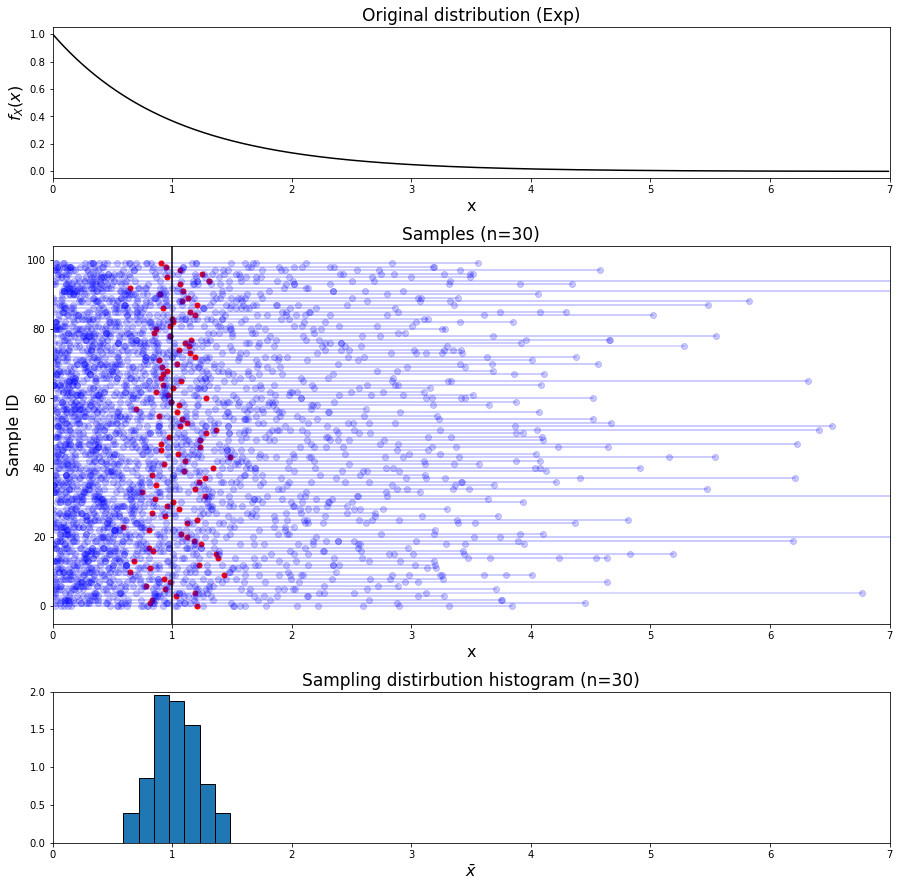

In [42]:
np.random.seed(0)
x = np.arange(0, 7, 0.01)
n = 30
num_samples = 100
samples = expon.rvs(size=n*num_samples).reshape(num_samples, n)
fig, axs = plt.subplots(3, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [1, 2.5, 1]})
plt.subplots_adjust(hspace=0.3)
xbar = samples.mean(axis = 1)
dist = expon.pdf(x)

axs[0].plot(x, dist, color = 'black')
axs[0].set_title("Original distribution (Exp)", fontsize = 17)
axs[0].set_xlabel('x', fontsize=16)
axs[0].set_xlim([0, 7])
axs[0].set_ylabel(r'$f_X(x)$', fontsize=16)

for i in range(num_samples):
    axs[1].plot(samples[i], n*[i], marker='o', color = 'blue', alpha = 0.2)
    axs[1].scatter(xbar[i], i, color = 'red', s=25)
axs[1].axvline(x=1, color='black')
axs[1].set_title("Samples (n={})".format(n), fontsize = 17)
axs[1].set_xlabel('x', fontsize=16)
axs[1].set_ylabel('Sample ID', fontsize=16)
axs[1].set_xlim([0, 7])

axs[2].hist(xbar, density=True, bins = 7, edgecolor='black', linewidth=1)
axs[2].set_xlim([0, 7])
axs[2].set_ylim([0, 2])
axs[2].set_title("Sampling distirbution histogram (n={})".format(n), fontsize = 17)
axs[2].set_xlabel(r'$\bar{x}$', fontsize=16)

plt.show()

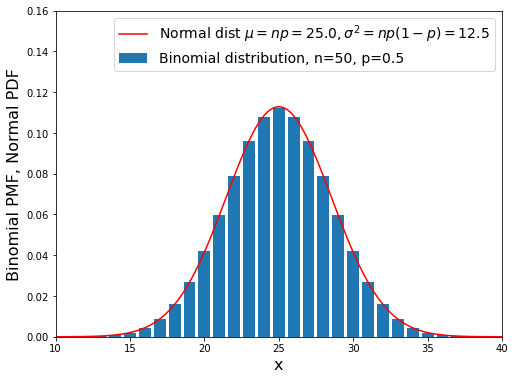

In [43]:
n = 50
p = 0.5
sample_size = 30
x1 = np.arange(0, n+1)
x2 = np.arange(0, n+1, 0.01)
binomial = binom.pmf(k=x1,n=n, p=p)
mu = n*p
var = n*p*(1-p)
normal = norm.pdf(x2, loc=mu, scale= var**0.5)
plt.figure(figsize=(8, 6))
plt.bar(x1, binomial, label = "Binomial distribution, n={0}, p={1}".format(n, p))
plt.plot(x2, normal, color = 'red',
         label=r"Normal dist $\mu=np={0}, \sigma^2=np(1-p)={1}$".format(mu, var))
plt.xlabel('x', fontsize=16)
plt.ylabel('Binomial PMF, Normal PDF', fontsize=16)
plt.xlim([10, 40])
plt.ylim([0, 0.16])
plt.legend(loc="best", fontsize=14)

plt.show()

### Chi-square distribution

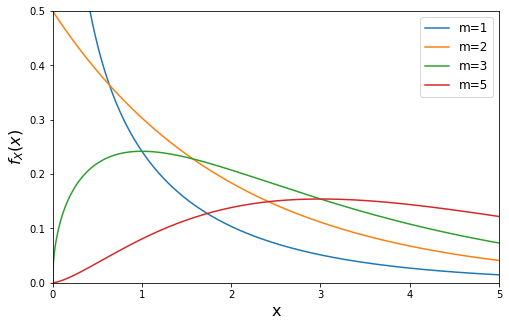

In [44]:
x = np.arange(0, 10, 0.01)
plt.figure(figsize=(8, 5))
for m in [1, 2, 3, 5]:
    y = chi2.pdf(x, df=m)   
    plt.plot(x, y, label='m={}'.format(m))
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.xlim([0, 5])
plt.ylim([0, 0.5])
plt.legend(loc='best', fontsize = 12)

plt.show()

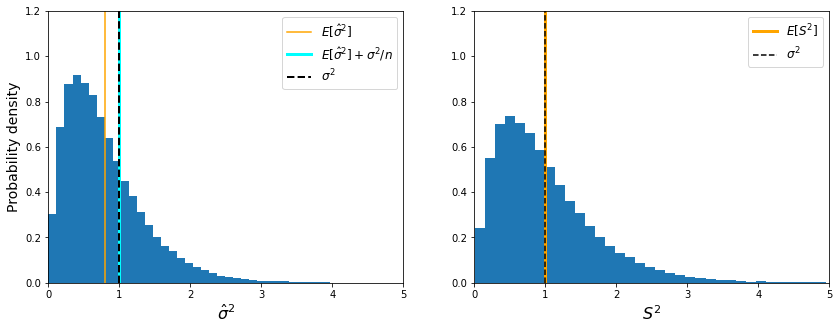

In [45]:
np.random.seed(0)
mu = 2
sigma2 = 1 
n = 5
n2 = 50
num_samples = 100000
samples = norm.rvs(loc = mu, scale = np.sqrt(sigma2),
                   size=n*num_samples).reshape(num_samples, n)
samples_mean = samples.mean(axis = 1)
sigma_hat2 = samples.var(axis = 1)
E_sigma_hat2 = sigma_hat2.mean()
sample_variance = samples.var(axis = 1, ddof=1)
E_sample_variance = sample_variance.mean()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(sigma_hat2,  density=True, bins = 50)
axs[0].axvline(x=E_sigma_hat2, color='orange', label=r"$E[\hat{\sigma}^2]$")
axs[0].axvline(x=E_sigma_hat2 + sigma2/n, linewidth=3,
               color='aqua', label=r"$E[\hat{\sigma}^2]+\sigma^2/n$")
axs[0].axvline(x=sigma2, linestyle='dashed',
               linewidth=2 , color='black', label=r"$\sigma^2$")
axs[0].set_ylim([0, 1.2])
axs[0].set_xlim([0, 5])
axs[0].set_xlabel(r"$\hat{\sigma}^2$", fontsize=16)
axs[0].set_ylabel("Probability density", fontsize=14)
axs[0].legend(loc='best', fontsize=12)

axs[1].hist(sample_variance, density=True, bins = 50)
axs[1].axvline(x=E_sample_variance, linewidth=3, color='orange', label=r"$E[S^2]$")
axs[1].axvline(x=sigma2, linestyle='dashed', color='black', label=r"$\sigma^2$")
axs[1].set_ylim([0, 1.2])
axs[1].set_xlim([0, 5])
axs[1].set_xlabel(r"$S^2$", fontsize=16)
axs[1].legend(loc='best', fontsize = 12)

plt.show()

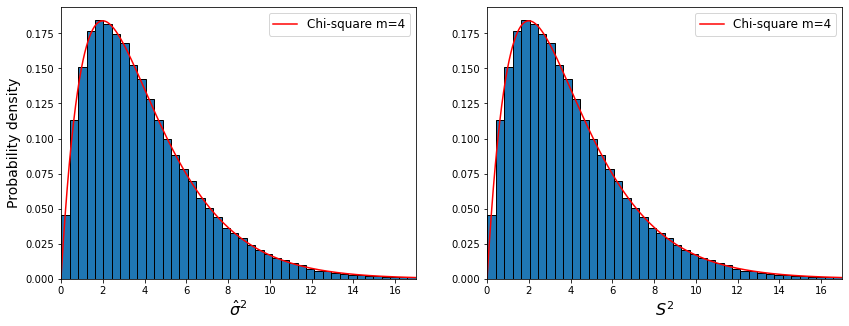

In [46]:
np.random.seed(0)   
mu = 2
sigma2 = 1 
n = 5
num_samples = 100000
samples = norm.rvs(loc = mu, scale = np.sqrt(sigma2),
                   size=n*num_samples).reshape(num_samples, n)
sigma_hat2 = samples.var(axis = 1)
sample_variance = samples.var(axis = 1, ddof=1)
c1 = n * sigma_hat2 / sigma2
c2 = (n-1) * sample_variance / sigma2

x = np.arange(0, 17, 0.01)
chi_dist = chi2.pdf(x=x, df=n-1)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(c1,  density=True, bins = 70, edgecolor='black', linewidth=1)
axs[0].plot(x, chi_dist, label='Chi-square m={}'.format(n-1), color='red')
axs[0].set_xlim([0, 17])
axs[0].set_xlabel(r"$\hat{\sigma}^2$", fontsize=16)
axs[0].set_ylabel("Probability density", fontsize=14)
axs[0].legend(loc='best', fontsize=12)

axs[1].hist(c2, density=True, bins = 70, edgecolor='black', linewidth=1)
axs[1].plot(x, chi_dist, label='Chi-square m={}'.format(n-1), color='red')
axs[1].set_xlim([0, 17])
axs[1].set_xlabel(r"$S^2$", fontsize=16)
axs[1].legend(loc='best', fontsize = 12)

plt.show()

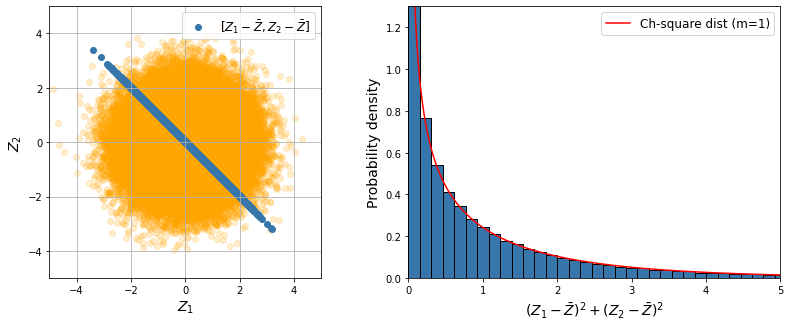

In [47]:
np.random.seed(0)   
mu = 0
sigma2 = 1 
n = 2
x = np.arange(0, 7, 0.01)
chi2_dist = chi2.pdf(x=x, df=2-1)
num_samples = 100000
z_i = norm.rvs(loc = mu, scale = np.sqrt(sigma2), size=n*num_samples).reshape(num_samples, n)
zbar = z_i.mean(axis = 1)
points = (z_i[:, 0] - zbar)**2 + (z_i[:, 1] - zbar)**2

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.1)

axs[0].set_aspect('equal')
axs[0].scatter(z_i[:, 0], z_i[:, 1], alpha=0.2, color='orange')
axs[0].scatter(z_i[:, 0] - zbar, z_i[:, 1] - zbar,
               color='#3776ab', label=r"$[Z_1-\bar{Z}, Z_2-\bar{Z}]$")
axs[0].set_xlim([-5, 5])
axs[0].set_ylim([-5, 5])
axs[0].grid()
axs[0].set_xlabel(r"$Z_1$", fontsize=14)
axs[0].set_ylabel(r"$Z_2$", fontsize=14)
axs[0].legend(loc='upper right', fontsize=12)

axs[1].set_xlabel(r"$Z_1-\bar{Z}$", fontsize=14)
axs[1].hist(points, density=True, bins = 150, edgecolor='black',
            linewidth=1, color='#3776ab')
axs[1].plot(x, chi2_dist, color = 'red', label="Ch-square dist (m=1)")
axs[1].set_xlim([0, 5])
axs[1].set_ylim([0, 1.3])
axs[1].legend(loc='best', fontsize=12)
axs[1].set_xlabel(r"$(Z_1-\bar{Z})^2+(Z_2-\bar{Z})^2$", fontsize=14)
axs[1].set_ylabel("Probability density", fontsize=14)

plt.show()

### Student’s t distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


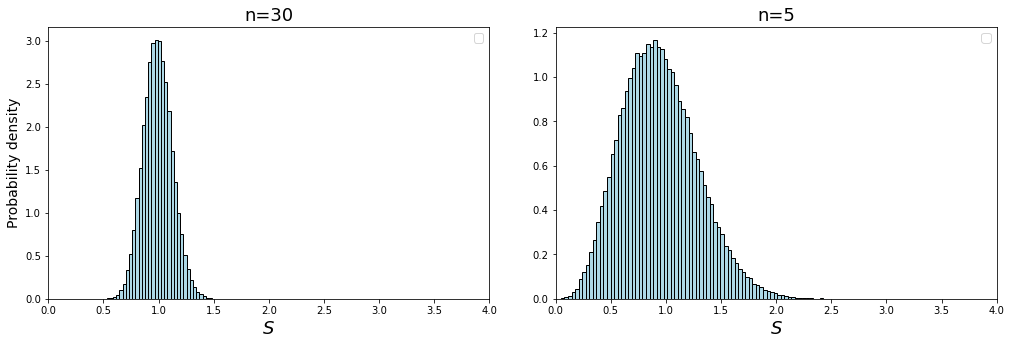

In [48]:
np.random.seed(1)
n1 = 30  
n2 = 5
mu = 2
num_samples = 100000

x1 = norm.rvs(loc=mu, scale=1, size=n1*num_samples).reshape(num_samples, n1)
s1 = x1.std(axis=1, ddof=1) 

x2= norm.rvs(loc=mu, scale=1, size=n2*num_samples).reshape(num_samples, n2)
s2 = x2.std(axis=1, ddof=1) 

fig, axs = plt.subplots(1, 2, figsize=(17, 5))
plt.subplots_adjust(wspace=0.15)

axs[0].hist(s1, bins= 40, density=True, edgecolor='black',
            linewidth=1, color='lightblue')
axs[0].legend(loc= 'best', fontsize = 12)
axs[0].set_xlim([0 , 4])
axs[0].set_xlabel(r"$S$", fontsize=18)
axs[0].set_ylabel("Probability density", fontsize=14)
axs[0].set_title("n=" + str(n1), fontsize=18)

axs[1].hist(s2, bins= 80, density=True, edgecolor='black',
            linewidth=1, color='lightblue')
axs[1].legend(loc= 'best', fontsize = 12)
axs[1].set_xlim([0 , 4])
axs[1].set_xlabel(r"$S$", fontsize=18)
axs[1].set_title("n=" + str(n2), fontsize=18)

plt.show()

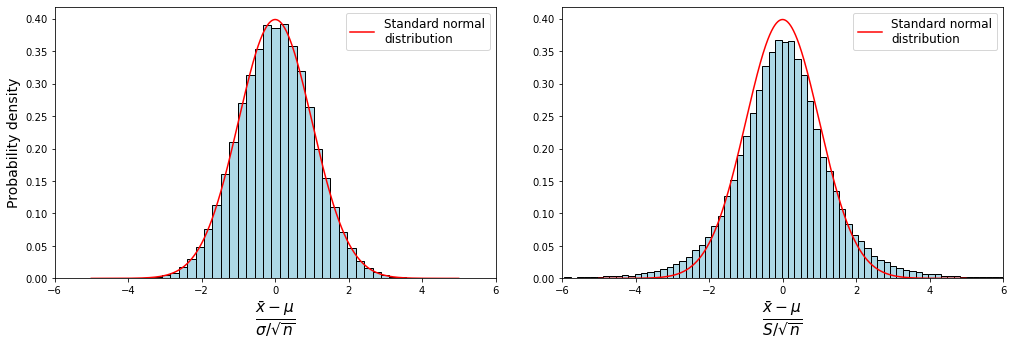

In [49]:
np.random.seed(1)
n = 5
mu = 2
num_samples = 100000
x = norm.rvs(loc=mu, scale=1, size=n*num_samples).reshape(num_samples, n)
xbar = x.mean(axis=1)
s = x.std(axis=1, ddof=1) 
zs = (xbar - mu) / (1 / n ** 0.5)
zs1 = (xbar - mu) / (s / n ** 0.5)
x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, loc=0, scale=1)

fig, axs = plt.subplots(1, 2, figsize=(17, 5))
plt.subplots_adjust(wspace=0.15)

axs[0].hist(zs, bins= 40, density=True, edgecolor='black',
            linewidth=1, color='lightblue')
axs[0].plot(x, y, color = 'red', label = "Standard normal\ndistribution")
axs[0].legend(loc= 'best', fontsize = 12)
axs[0].set_xlim([-6 ,6])
axs[0].set_xlabel(r"$\frac{\bar{x}-\mu}{\sigma / \sqrt{n}}}$", fontsize=22)
axs[0].set_ylabel("Probability density", fontsize=14)

axs[1].hist(zs1, bins= 400, density=True, edgecolor='black',
            linewidth=1, color='lightblue')
axs[1].plot(x, y, color = 'red', label = "Standard normal\ndistribution")
axs[1].legend(loc= 'best', fontsize = 12)
axs[1].set_xlim([-6 ,6])
axs[1].set_xlabel(r"$\frac{\bar{x}-\mu}{S / \sqrt{n}}}$", fontsize=22)

plt.show()

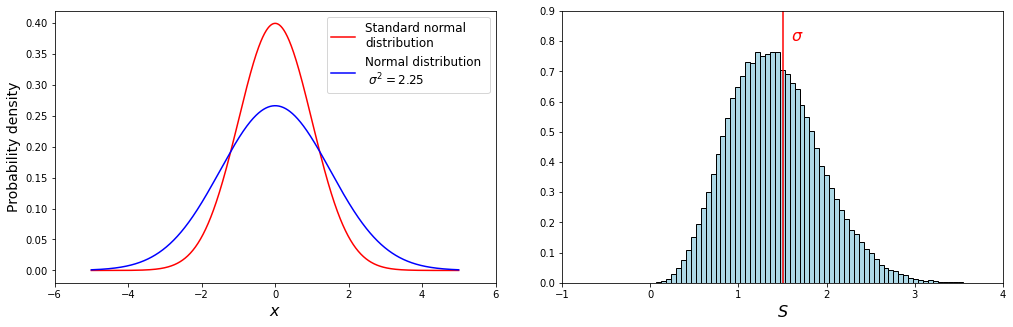

In [50]:
np.random.seed(1)
n = 5
mu = 2
sigma = 1.5
num_samples = 100000
x = norm.rvs(loc=mu, scale=sigma, size=n*num_samples).reshape(num_samples, n)
xbar = x.mean(axis=1)
s = x.std(axis=1, ddof=1) 

x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, loc=0, scale=1)
y1 = norm.pdf(x, loc=0, scale=sigma)

fig, axs = plt.subplots(1, 2, figsize=(17, 5))
plt.subplots_adjust(wspace=0.15)

axs[0].plot(x, y, color = 'red', label = "Standard normal\ndistribution")
axs[0].plot(x, y1, color = 'blue', label="Normal distribution \n $\sigma^2={}$".format(sigma**2))
axs[0].legend(loc= 'best', fontsize = 12)
axs[0].set_xlim([-6 ,6])
axs[0].set_xlabel("$x$", fontsize=16)
axs[0].set_ylabel("Probability density", fontsize=14)

axs[1].hist(s, bins= 70, density=True, edgecolor='black',
            linewidth=1, color='lightblue')

axs[1].text(1.6, 0.8, r"$\sigma$", color = 'red', fontsize = 16)
axs[1].set_xlim([-1 ,4])
axs[1].set_ylim([0 , 0.9])
axs[1].set_xlabel(r"$S$", fontsize=16)
axs[1].axvline(x=sigma, color='red')

plt.show()

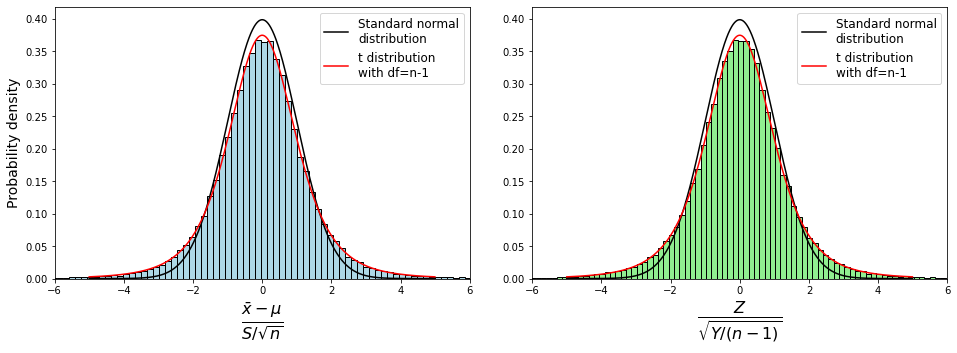

In [51]:
from scipy.stats import t

np.random.seed(1)
n = 5
mu = 2
num_samples = 100000

x = norm.rvs(loc=mu, scale=1, size=n*num_samples).reshape(num_samples, n)
xm = x.mean(axis=1)
s = x.std(axis=1, ddof=1) 
ts = (xm - mu) / (s / n ** 0.5)

V = chi2.rvs(df=n-1, size=100000)   
Z = norm.rvs(loc=0, scale=1, size=100000)
T = Z / np.sqrt(V / (n-1))

x = np.arange(-5, 5, 0.01)
norm_dist = norm.pdf(x, loc=0, scale=1)
t_dist = t.pdf(x, df=n-1, loc=0, scale=1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
plt.subplots_adjust(wspace=0.15)

axs[0].hist(ts, bins= 400, density=True, edgecolor='black', linewidth=1, color='lightblue')
axs[0].plot(x, norm_dist, color = 'black', label = 'Standard normal\ndistribution')
axs[0].plot(x, t_dist, color = 'red', label = "t distribution\nwith df=n-1")
axs[0].legend(loc= 'best', fontsize = 12)
axs[0].set_xlim([-6 ,6])
axs[0].set_xlabel(r"$\frac{\bar{x}-\mu}{S/ \sqrt{n}}}$", fontsize = 23)
axs[0].set_ylabel("Probability density", fontsize = 14)

axs[1].hist(T, bins= 300, density=True, edgecolor='black', linewidth=1, color='lightgreen')
axs[1].plot(x, norm_dist, color = 'black', label = 'Standard normal\ndistribution')
axs[1].plot(x, t_dist, color = 'red', label = "t distribution\nwith df=n-1")
axs[1].legend(loc= 'best', fontsize = 12)
axs[1].set_xlim([-6 ,6])
axs[1].set_xlabel(r"$\frac{Z}{\sqrt{Y/(n-1)}}}$", fontsize = 23)

plt.show()

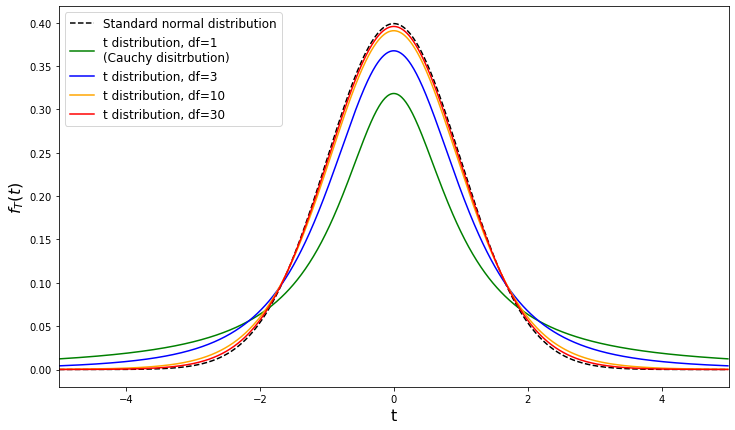

In [52]:
plt.figure(figsize = (12, 7))
x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, loc=0, scale=1)
y1 = t.pdf(x, df= 1, loc=0, scale=1)
y2 = t.pdf(x, df= 3, loc=0, scale=1)
y3 = t.pdf(x, df= 12, loc=0, scale=1)
y4 = t.pdf(x, df= 30, loc=0, scale=1)
plt.plot(x, y, color = 'black', linestyle='dashed', label = "Standard normal distribution")
plt.plot(x, y1, color = 'green', label = "t distribution, df=1\n(Cauchy disitrbution)")
plt.plot(x, y2, color = 'blue', label = "t distribution, df=3")
plt.plot(x, y3, color = 'orange', label = "t distribution, df=10")
plt.plot(x, y4, color = 'red', label = "t distribution, df=30")

plt.legend(loc='upper left', fontsize=12)
plt.xlabel('t', fontsize=16)
plt.ylabel('$f_T(t)$', fontsize=16)
plt.xlim([-5, 5])

plt.show()

### F disitrbution

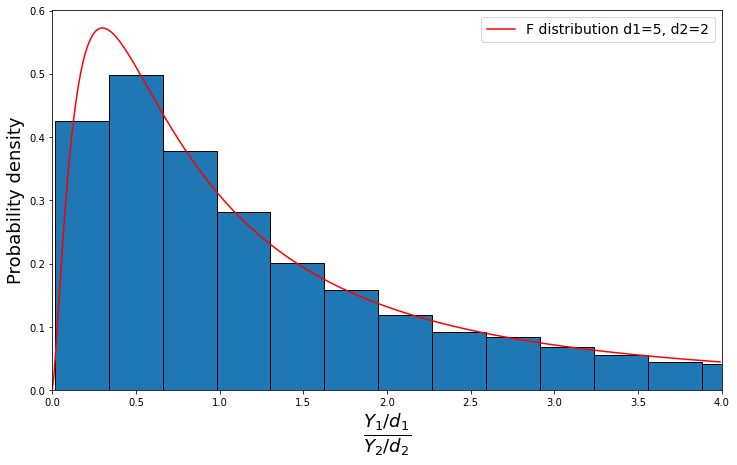

In [53]:
np.random.seed(0)   
df1 = 5
df2 = 2
x_lim = 4
num_samples = 5000
samples_df1 = chi2.rvs(df=df1, size=num_samples) 
samples_df2 = chi2.rvs(df=df2, size=num_samples) 
F_rvs = (samples_df1 / df1) / (samples_df2 / df2)
x = np.arange(0, x_lim, 0.01)
F_dist = f.pdf(x=x, dfn=df1, dfd=df2)

plt.figure(figsize = (12, 7))

plt.hist(F_rvs,  density=True, bins = 13000, edgecolor='black', linewidth=1)
plt.plot(x, F_dist, label='F distribution d1={}, d2={}'.format(df1, df2), color='red')
plt.xlim([0, x_lim])
plt.xlabel(r"$\frac{Y_1/d_1}{Y_2/d_2}$", fontsize=26)
plt.ylabel("Probability density", fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.savefig('53.png', dpi=300, bbox_inches='tight') 
plt.show()

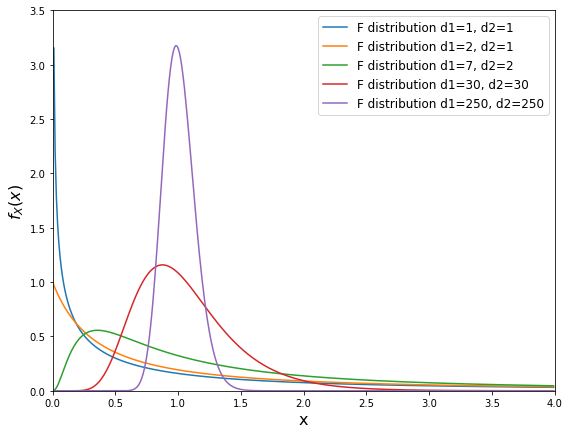

In [54]:
np.random.seed(0)   
dfs_list = [(1, 1), (2, 1), (7, 2), (30, 30), (250, 250)]
x = np.arange(0, 4, 0.01)
plt.figure(figsize = (9, 7))
for (df1, df2) in dfs_list:   
    F_dist = f.pdf(x=x, dfn=df1, dfd=df2)
    plt.plot(x, F_dist, label='F distribution d1={}, d2={}'.format(df1, df2))

plt.xlim([0, 4])
plt.ylim([0, 3.5])
plt.xlabel("x", fontsize=16)
plt.ylabel(r"$f_X(x)$", fontsize=16)
plt.legend(loc='best', fontsize=12)

plt.show()

In [55]:
np.random.seed(5)   
d1 = 15
d2 = 10
var1 = 5
var2 = 1
mean1 = 1
mean2 = 0
sample1 = norm.rvs(loc=mean1, scale=np.sqrt(var1), size=d1) 
sample2 = norm.rvs(loc=mean2, scale=np.sqrt(var2), size=d2)
sample_var1 = np.var(sample1, ddof=1)
sample_var2 = np.var(sample2, ddof=1)
print("Sample 1:", sample1)
print("sample_var1: ", sample_var1)
print()
print("Sample 2:", sample2)
print("sample_var2: ", sample_var2)

Sample 1: [ 1.98661465  0.26015185  6.43536961  0.43630486  1.24509506  4.53853535
 -1.03310546 -0.32293979  1.41949357  0.26238835 -1.66710275  0.5418822
  0.19763408  2.34940353 -2.72258032]
sample_var1:  5.29540541147499

Sample 2: [-0.70017904  1.15139101  1.85733101 -1.51117956  0.64484751 -0.98060789
 -0.85685315 -0.87187918 -0.42250793  0.99643983]
sample_var2:  1.2827153177349788


In [56]:
F = sample_var1 / sample_var2
F

4.128277988311254

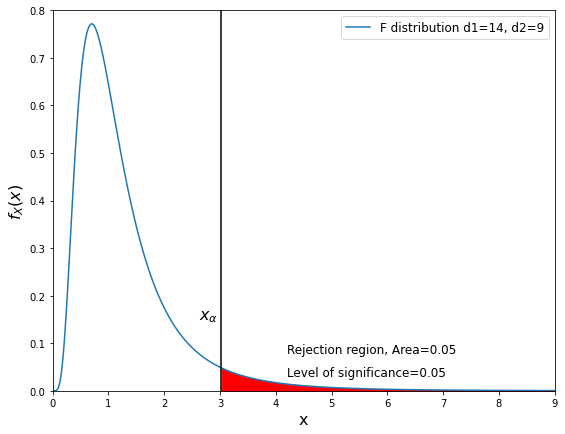

In [57]:
x = np.arange(0, 9, 0.01)
plt.figure(figsize = (9, 7))
F_dist = f.pdf(x=x, dfn=d1-1, dfd=d2-1)
x_alpha = f.ppf(q=0.95, dfn=d1-1, dfd=d2-1)
plt.plot(x, F_dist, label='F distribution d1={}, d2={}'.format(d1-1, d2-1))
plt.fill_between(x, F_dist, 0, where = (x >= x_alpha) & (x <= np.inf), color = 'red')
plt.axvline(x= x_alpha, color='black')
plt.xlim([0, 9])
plt.ylim([0, 0.8])
plt.xlabel("x", fontsize=16)
plt.ylabel(r"$f_X(x)$", fontsize=16)
plt.legend(loc='best', fontsize=12)

plt.text(4.2, 0.08, "Rejection region, Area=0.05", fontsize=12)
plt.text(4.2, 0.03, "Level of significance=0.05", fontsize=12)
plt.text(x_alpha-0.4, 0.15, r"$x_{\alpha}$", fontsize=16)

plt.show()

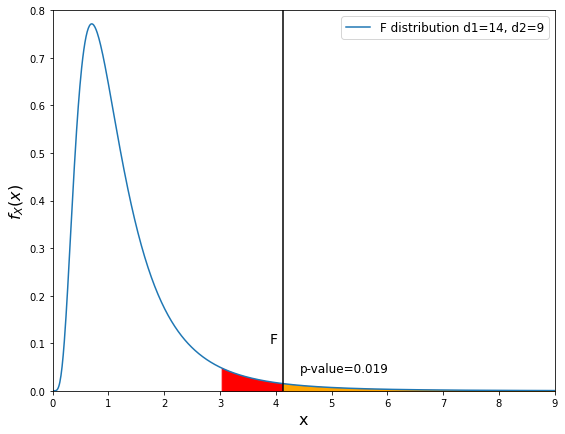

In [58]:
x = np.arange(0, 9, 0.01)
plt.figure(figsize = (9, 7))
F_dist = f.pdf(x=x, dfn=d1-1, dfd=d2-1)
lim = f.ppf(q=0.95, dfn=d1-1, dfd=d2-1)
plt.plot(x, F_dist, label='F distribution d1={}, d2={}'.format(d1-1, d2-1))
plt.fill_between(x, F_dist, 0, where = (x >= x_alpha) & (x <= np.inf), color = 'red')
plt.fill_between(x, F_dist, 0, where = (x >= F) & (x <= np.inf), color = 'orange')
plt.axvline(x= F, color='black')
plt.xlim([0, 9])
plt.ylim([0, 0.8])
plt.xlabel("x", fontsize=16)
plt.ylabel(r"$f_X(x)$", fontsize=16)
plt.legend(loc='best', fontsize=12)

p_value = 1-f.cdf(x=F, dfn=d1-1, dfd=d2-1)
plt.text(F+0.3, 0.04, "p-value={}".format(np.round(p_value, 3)),
         fontsize=12)
plt.text(F-0.23, 0.1, "F", fontsize=14)

plt.show()

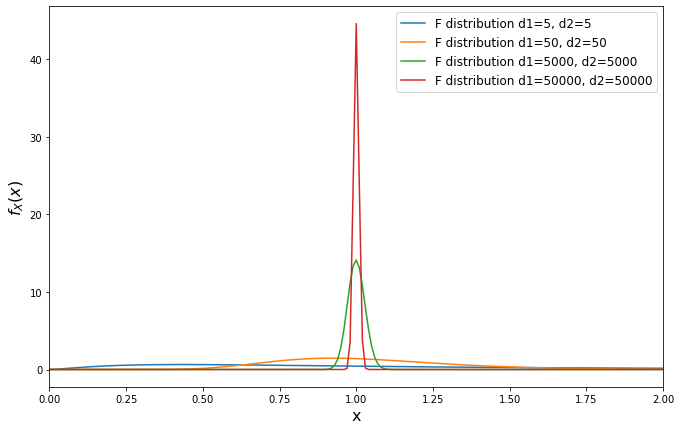

In [59]:
np.random.seed(0)   
dfs_list = [(5, 5), (50, 50), (5000, 5000), (50000, 50000)]
x = np.arange(0, 4, 0.01)
plt.figure(figsize = (11, 7))
for (df1, df2) in dfs_list:   
    F_dist = f.pdf(x=x, dfn=df1, dfd=df2)
    plt.plot(x, F_dist, label='F distribution d1={}, d2={}'.format(df1, df2))

plt.xlim([0, 2])
#plt.ylim([0, 3.5])
plt.xlabel("x", fontsize=16)
plt.ylabel(r"$f_X(x)$", fontsize=16)
plt.legend(loc='best', fontsize=12)

plt.show()